In [1]:
'''
 THESIS: As the USD currency becomes devalued, society tends to disintegrate into despair.
         Short-term thinking and a high-time preference can be observed in such societies,
         which tend to be expressed in the form of hedonism. The following models are an attempt at finding a mathematical
         relationship between hedonism (particularly sexual) and money supply (i,e, FED Funds rate prediction)
'''


'\n THESIS: As the USD currency becomes devalued, society tends to disintegrate into despair.\n         Short-term thinking and a high-time preference can be observed in such societies,\n         which tend to be expressed in the form of hedonism. The following models are an attempt at finding a mathematical\n         relationship between hedonism (particularly sexual) and money supply (i,e, FED Funds rate prediction)\n'

In [3]:
import gspread
import pandas as pd

In [55]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
service_account = gspread.service_account(filename="/Users/timal/.config/gspread/service_account.json")
sheet = service_account.open('tryst')
work_sheet = sheet.worksheet('tryst')

In [5]:
all_values = work_sheet.get_all_values()

In [6]:
tryst_df = pd.DataFrame(all_values)

In [7]:
tryst_df.rename(columns=tryst_df.iloc[0], inplace=True)
tryst_df.drop(tryst_df.index[0], inplace=True)
tryst_df

,Month,tryst: (United States),change
1,2004-01,7,
2,2004-02,9,0.2857142857
3,2004-03,13,0.4444444444
4,2004-04,6,-0.5384615385
5,2004-05,11,0.8333333333
...,...,...,...
217,2022-01,80,0
218,2022-02,91,0.1375
219,2022-03,90,-0.01098901099
220,2022-04,88,-0.02222222222


In [8]:
sheet_2 = service_account.open('FEDFUNDS')
work_sheet_2 = sheet_2.worksheet('FEDFUNDS')

In [9]:
fed_funds_df = pd.DataFrame(work_sheet_2.get_all_values())

In [10]:
fed_funds_df.rename(columns=fed_funds_df.iloc[0], inplace=True)
fed_funds_df.drop(fed_funds_df.index[0], inplace=True)
fed_funds_df

,DATE,FEDFUNDS,change
1,2004-01-01,1,
2,2004-02-01,1.01,0.01
3,2004-03-01,1,-0.009900990099
4,2004-04-01,1,0
5,2004-05-01,1,0
...,...,...,...
217,2022-01-01,0.08,0
218,2022-02-01,0.08,0
219,2022-03-01,0.2,1.5
220,2022-04-01,0.33,0.65


In [11]:
fed_funds_and_tryst_df = pd.DataFrame([tryst_df.Month, fed_funds_df.change, tryst_df.change]).transpose()

In [12]:
fed_funds_and_tryst_df.columns = ['Date', 'Fed Funds Change', 'Tryst Searches Change']

In [27]:
fed_funds_and_tryst_df

,Date,Fed Funds Change,Tryst Searches Change
1,2004-01,,
2,2004-02,0.01,0.2857142857
3,2004-03,-0.009900990099,0.4444444444
4,2004-04,0,-0.5384615385
5,2004-05,0,0.8333333333
...,...,...,...
217,2022-01,0,0
218,2022-02,0,0.1375
219,2022-03,1.5,-0.01098901099
220,2022-04,0.65,-0.02222222222


In [28]:
fed_funds_and_tryst_df[['Fed Funds Change', 'Tryst Searches Change']] = fed_funds_and_tryst_df[['Fed Funds Change', 'Tryst Searches Change']].apply(pd.to_numeric)

In [64]:
service_account = gspread.service_account(filename="/Users/timal/.config/gspread/service_account.json")
sheet = service_account.open('tryst_fedfunds')
work_sheet = sheet.worksheet('tryst_fedfunds')

In [65]:
tryst_fedfunds = pd.DataFrame(work_sheet.get_all_values())
tryst_fedfunds.rename(columns=tryst_fedfunds.iloc[0], inplace=True)
tryst_fedfunds.drop(tryst_fedfunds.index[0], inplace=True)
tryst_fedfunds

,tryst,fed_funds
1,7,1
2,9,1.01
3,13,1
4,6,1
5,11,1
...,...,...
217,80,0.08
218,91,0.08
219,90,0.2
220,88,0.33


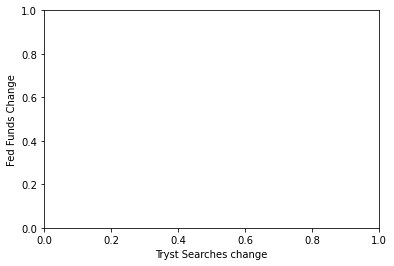

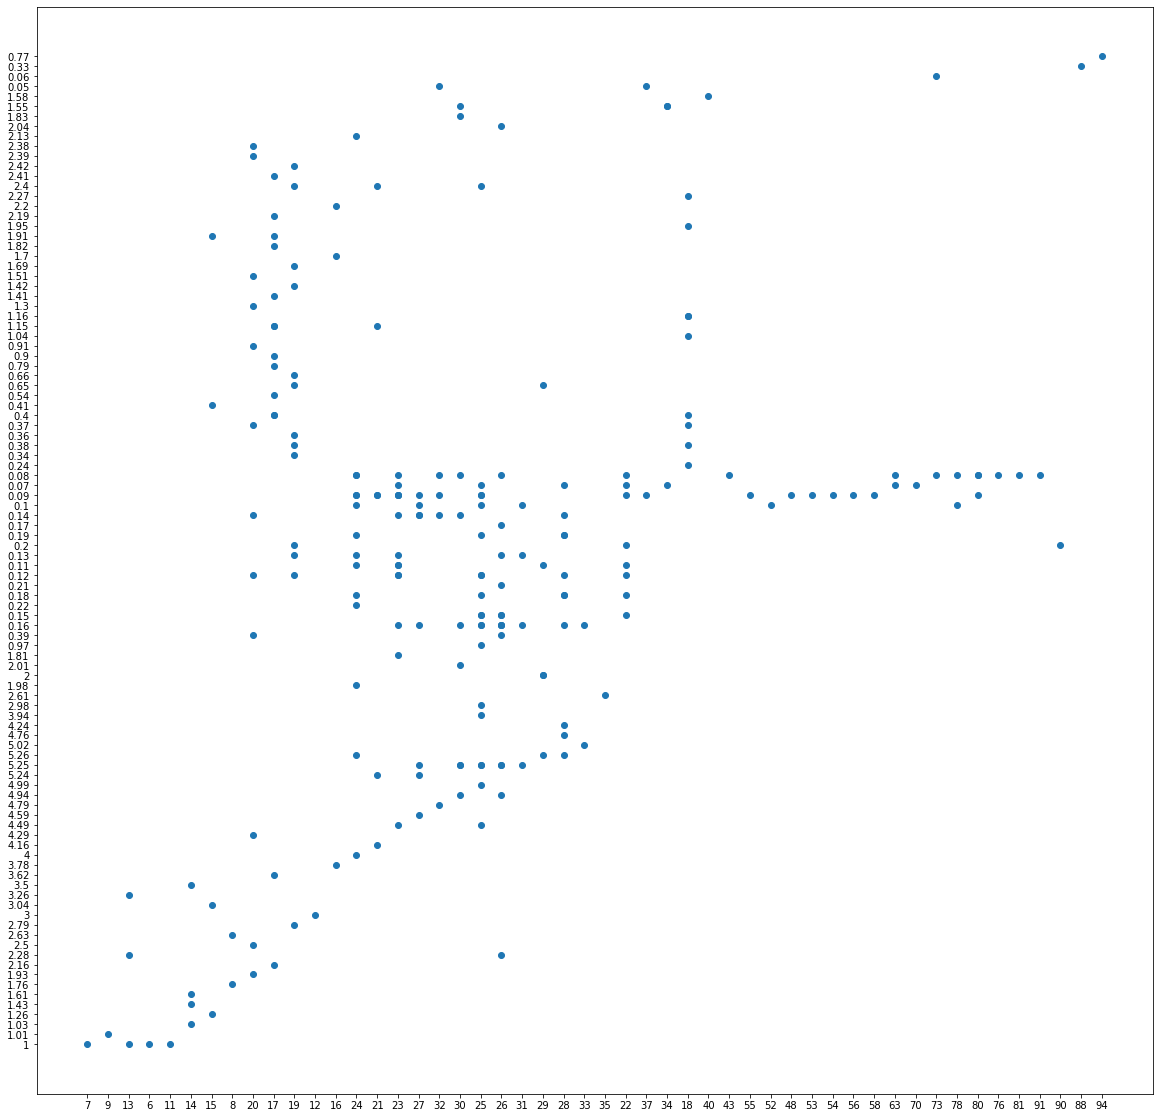

In [67]:
%matplotlib inline
plt.xlabel('Tryst Searches change')
plt.ylabel('Fed Funds Change')
plt.figure(figsize=(20,20))
plt.scatter(tryst_fedfunds['tryst'],tryst_fedfunds['fed_funds'])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(tryst_fedfunds.tryst, tryst_fedfunds.fed_funds, test_size=0.2)
classifier = LinearRegression()
classifier.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [70]:
classifier.score(x_test.values.reshape(-1,1), y_test)

-0.017801840677071246

In [47]:
x_train, x_test, y_train, y_test = train_test_split(tryst_fedfunds.tryst_change, tryst_fedfunds.fed_funds_change, test_size=0.2)

In [58]:
classifier = LinearRegression()
classifier.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [60]:
classifier.predict(x_test.values.reshape(-1, 1))

array([0.03208551, 0.02999984, 0.03101288, 0.03202592, 0.03198539,
       0.03074861, 0.0306752 , 0.03060766, 0.03267058, 0.03194799,
       0.02877353, 0.0318812 , 0.03125601, 0.03029779, 0.03048103,
       0.03101288, 0.03182331, 0.03065533, 0.03182331, 0.03101288,
       0.0295827 , 0.03056264, 0.03081681, 0.03428577, 0.03192461,
       0.03213848, 0.03036164, 0.0307791 , 0.03135056, 0.03116873,
       0.03076975, 0.03004036, 0.03101288, 0.03127715, 0.03014456,
       0.02968326, 0.0307958 , 0.03052662, 0.03274952, 0.031238  ,
       0.02995579, 0.03231536, 0.03209828, 0.03202592])

In [63]:
classifier.score(x_test.values.reshape(-1,1), y_test)

-0.08700724603618615

In [ ]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test))